In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

In [2]:
# Credit Card Transactions Fraud Detection
# Syntetic data

df = pd.read_csv("../data/raw/fraudTrain.csv")
df = df.drop('Unnamed: 0', axis=1)

Training set for Credit Card Transactions

* **index** Unique Identifier for each row
* **transdatetrans_time** - Transaction DateTime
* **cc_num** - Credit Card Number of Customer
* **merchant** - Merchant Name
* **category** - Category of Merchant
* **amt** - Amount of Transaction
* **first** - First Name of Credit Card Holder
* **last** - Last Name of Credit Card Holder
* **gender** - Gender of Credit Card Holder
* **street** - Street Address of Credit Card Holder
* **city** - City of Credit Card Holder
* **state** - State of Credit Card Holder
* **zip** - Zip of Credit Card Holder
* **lat** - Latitude Location of Credit Card Holder
* **long** - Longitude Location of Credit Card Holder
* **city_pop** - Credit Card Holder's City Population
* **job** - Job of Credit Card Holder
* **dob** - Date of Birth of Credit Card Holder
* **trans_num** - Transaction Number
* **unix_time** - UNIX Time of transaction
* **merch_lat** - Latitude Location of Merchant
* **merch_long** - Longitude Location of Merchant
* **is_fraud** - Fraud Flag <--- Target Class

In [3]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

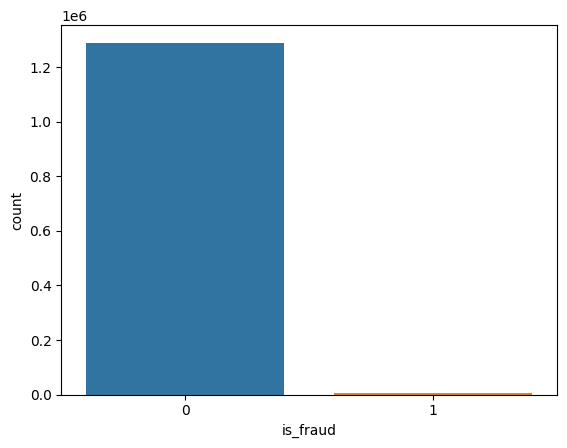

In [6]:
sns.countplot(x="is_fraud", data=df)

In [7]:
frauds = df[df.is_fraud == 1]
no_frauds = df[df.is_fraud == 0]

<AxesSubplot:xlabel='amt', ylabel='Density'>

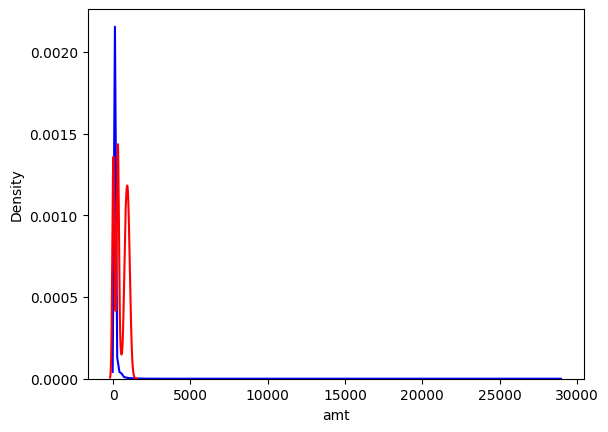

In [8]:
sns.kdeplot(x="amt", data=no_frauds, color='blue')
sns.kdeplot(x="amt", data=frauds, color='red')

In [9]:
# What are the dates that we have?
print("Init date: ", df["trans_date_trans_time"].min())
print("End date: ", df["trans_date_trans_time"].max())

Init date:  2019-01-01 00:00:18
End date:  2020-06-21 12:13:37


In [10]:
df[df.is_fraud == 1].head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [11]:
# Do we have recurrent frauds using the same credit card?
frauds.groupby("cc_num")["is_fraud"].count()

cc_num
60416207185             9
60422928733            12
60423098130            10
60427851591            14
60490596305            10
                       ..
4911818930706644725     9
4956828990005111019    10
4973530368125489546    10
4980323467523543940    10
4992346398065154184     8
Name: is_fraud, Length: 762, dtype: int64

In [12]:
frauds_time = frauds.groupby("trans_date_trans_time")["is_fraud"].count().reset_index()
frauds_time

,trans_date_trans_time,is_fraud
0,2019-01-02 01:06:37,1
1,2019-01-02 01:47:29,1
2,2019-01-02 03:05:23,1
3,2019-01-02 03:38:03,1
4,2019-01-02 03:55:47,1
...,...,...
7496,2020-06-21 01:00:08,1
7497,2020-06-21 01:53:35,1
7498,2020-06-21 02:16:56,1
7499,2020-06-21 03:26:20,1


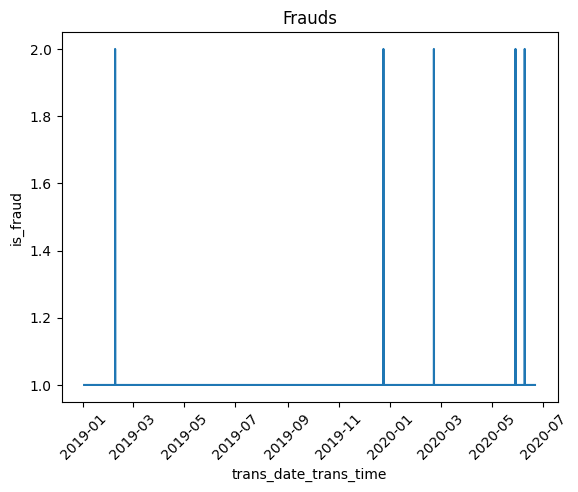

In [13]:
sns.lineplot(x="trans_date_trans_time", y="is_fraud", data=frauds_time)
plt.title("Frauds")
plt.xticks(rotation = 45);

<AxesSubplot:>

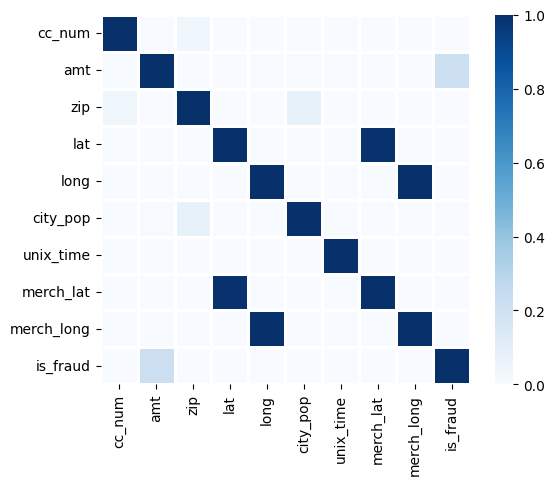

In [14]:
# Is ammount correlated to is_fraud?
df_corr = df.corr()

sns.heatmap(df_corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

# Merchant location for frauds

In [15]:
frauds["text"] = frauds["cc_num"]

/var/folders/4t/35nfm0b159g9bz03rt5zzm_h0000gn/T/ipykernel_23554/999524144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds["text"] = frauds["cc_num"]


In [16]:
fig = go.Figure(data=go.Scattergeo(
        lon = frauds['merch_long'],
        lat = frauds['merch_lat'],
        text = frauds['text'],
        mode = 'markers'
#
        ))

fig.update_layout(
        title = 'Frauds)',
        geo_scope='world',
    )
fig.show()